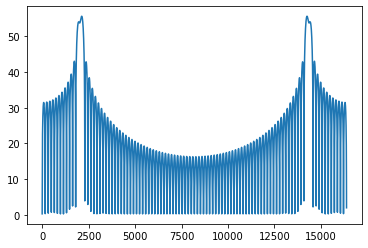

In [5]:
#1stquestion
import sys
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import librosa
import scipy as sp


N = 16482#  chosen value
n = np.arange(101)
zeros = np.zeros(8141)

n = np.arange(-4,0)
x_in=10*np.cos(0.24*np.pi*n + 0.2*np.pi) + 12*np.sin(0.26*np.pi*n-0.8*np.pi)#creating the given function

n = np.arange(101)
x_in2 = 10*np.cos(0.24*np.pi*n + 0.2*np.pi) + 12*np.sin(0.26*np.pi*n-0.8*np.pi)

x_con = np.concatenate((zeros,x_in2),axis=None)
x_con = np.concatenate((x_con,zeros),axis=None)

dft_xcon = np.fft.fft(x_con)
db_xcon=20*np.log10(np.abs(dft_xcon))
plt.plot(db_xcon)#dtft in log scale
plt.show()


[0.34199052+0.j         0.34199025+0.00026166j 0.34198944+0.00052333j ...
 0.34198808-0.00078499j 0.34198944-0.00052333j 0.34199025-0.00026166j]


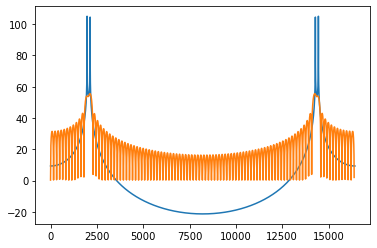

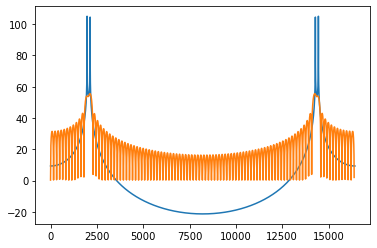

In [6]:
#covariance method
import cmath as cm
n = np.arange(-4,0)
x_in=10*np.cos(0.24*np.pi*n + 0.2*np.pi) + 12*np.sin(0.26*np.pi*n-0.8*np.pi)#creating given function
xcon=np.concatenate((x_in2,x_in),axis=None)

fr=np.zeros((5,5),dtype=float)
m1=0   
while m1<101:
    for i1 in range(5):
        for k1 in range(5):
            fr[i1][k1]+=xcon[m1-i1]*xcon[m1-k1]
    m1=m1+1
p_s_i=np.zeros((4,1))
F_i=np.zeros((4,4))

for i1 in range(1,5):
    p_s_i[i1-1]=fr[i1][0]
    for k1 in range(1,5):
        F_i[i1-1][k1-1]=fr[i1][k1]

#calculating a
a=np.linalg.solve(F_i,p_s_i)
# roots and coeffs
Aco_zcoeff=[1,-a[0],-a[1],-a[2],-a[3]]
Aco_roots=np.roots(Aco_zcoeff)
#plot for 2.2d
N=16424    #chosen value
ni=np.arange(0,N)

j=cm.sqrt(-1)
i=(j*2*np.pi*ni/N)
z=np.exp(i)
#
Aco_z=1
l1=1
while l1<5:
    hlp=z**(l1)
    Aco_z+=Aco_zcoeff[l1]*hlp
    l1=l1+1
H3=1/np.abs(Aco_z)
print(Aco_z)
plt.plot(20*np.log10(H3))
plt.plot(db_xcon)
plt.show()
#
Aco_sdfg=(z-Aco_roots[0])*(z-Aco_roots[1])*(z-Aco_roots[2])*(z-Aco_roots[3])#polynomial
H2=1/np.abs(Aco_sdfg)
plt.plot(ni,20*np.log10(H2))
plt.plot(db_xcon)
plt.show()







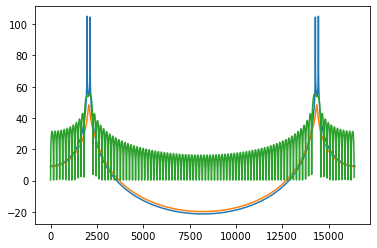

In [7]:
#2.2c autocorrelation method
n = np.arange(101)
x_in = 10*np.cos(0.24*np.pi*n + 0.2*np.pi) + 12*np.sin(0.26*np.pi*n-0.8*np.pi)#creating given function

ham=sp.signal.get_window("hamming", 101)
x_win=x_in*ham#creating windowed signal
fr=np.zeros((5,5),dtype=float)
r=np.zeros((5,1),dtype=float)
m1=0
for i1 in range(5):
    for k1 in range(5):
        hlp=np.abs(i1-k1)
        for m1 in range(0,101-hlp):
            fr[i1][k1]+=x_win[m1+i1-k1]*x_win[m1]
            
        r[hlp]=fr[i1][k1]
p_s_i=np.zeros((4,1))
F_i=np.zeros((4,4))

for i1 in range(4):
    p_s_i[i1]=r[i1+1]
    for k1 in range(4):
        if k1>=i1:
            F_i[i1][k1]=r[k1-i1]
        elif k1<i1:
            F_i[i1][k1]=r[i1-k1]

a=np.linalg.solve(F_i,p_s_i)#calculating a

#graph for 2.2d
Aut_zcoeff=[1,-a[0],-a[1],-a[2],-a[3]] # Aut(z)   coeffs
Aut_roots=np.roots(Aut_zcoeff)    #   Aut(z)  roots

N=16424#chosen value
ni=np.arange(0,N)

j=cm.sqrt(-1)
i=(j*2*np.pi*ni/N)
z=np.exp(i)
#plotting
l1=1
Aut_z=1
while l1<5:
    hlp=z**(l1)
    Aut_z+=Aut_zcoeff[l1]*hlp
    l1=l1+1
H3_sdf=1/np.abs(Aut_z)
plt.plot(20*np.log10(H2))
plt.plot(20*np.log10(H3_sdf))
plt.plot(db_xcon)
plt.show()

In [4]:
#2.2e
#parathrw oti h methodos covariance sthn sygekrimenh periptwsh prosegizei kalytera ta  spikes  
#tou shmatos twn dyo hmitonoeidwn auto symbainei dioti h methodos covariance einai kalyterh sthn prosegish  
#texnitwn shmatwn se sxesh me thn methodo tou autocorrelation h opoia endeiknitai gia perigrafh fusikwn shmatwn
#sta opoia synantatai thorybos se periptwseis thorubou h methodos covariance exei arketa shmantika sfalmata
#
#
#

In [34]:
#